In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('athlete_events 2.csv')

/var/folders/9n/jvxczw3j3mbgs3rdk9lnk9km0000gn/T/ipykernel_16919/2669261626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='coolwarm')


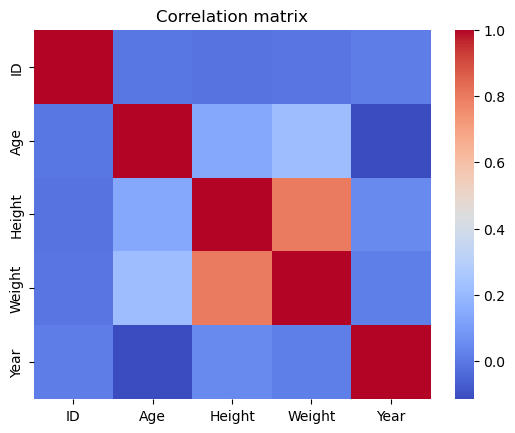

In [4]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [5]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare the 'Medal_Won' column (1 if a medal was won, otherwise 0)
df['Medal_Won'] = df['Medal'].apply(lambda x: 0 if pd.isna(x) else 1)

# Select numeric features for the model: 'Age', 'Weight', 'Height', 'Year'
features = ['Age', 'Weight', 'Height', 'Year']

# Drop rows with missing values in the selected features to ensure a clean dataset
df = df.dropna(subset=features)

# One-hot encode categorical variables ('NOC' and 'Sport')
df = pd.get_dummies(df, columns=['NOC', 'Sport'], drop_first=True)

# Define the feature set (X) and target variable (y)
X = df[features + [col for col in df.columns if col.startswith('NOC_') or col.startswith('Sport_')]]
y = df['Medal_Won']

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model 1: Logistic Regression with Class Weighting ###
log_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions and evaluate the Logistic Regression model
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

### Model 2: Random Forest with Class Weighting ###
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the Random Forest model
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     52750
           1       0.26      0.66      0.38      9100

    accuracy                           0.68     61850
   macro avg       0.59      0.67      0.58     61850
weighted avg       0.82      0.68      0.73     61850

Random Forest Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     52750
           1       0.59      0.44      0.50      9100

    accuracy                           0.87     61850
   macro avg       0.75      0.69      0.72     61850
weighted avg       0.86      0.87      0.86     61850

